In [1]:
# First "basic network"
import keras

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

### First simple model

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [7]:
# We now need to pre-process the data to make sure it can be fed to the network...
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../datasets/cats_and_dogs_small/train/'
validation_dir = '../datasets/cats_and_dogs_small/validation'

In [22]:
# ...we do so by creating generators that will transform the data on the fly as we feed it to the network
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [24]:
# We can now fit the model using the generators above
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 151ms/step - loss: 0.6870 - acc: 0.5405 - val_loss: 0.6730 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6463 - acc: 0.6245 - val_loss: 0.6552 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6023 - acc: 0.6680 - val_loss: 0.6169 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5682 - acc: 0.7050 - val_loss: 0.6176 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5500 - acc: 0.7200 - val_loss: 0.6115 - val_acc: 0.6580
Epoch 6/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5300 - acc: 0.7285 - val_loss: 0.6042 - val_acc: 0.6580
Epoch 7/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5051 - acc: 0.7595 - val_loss: 0.6060 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 1

In [33]:
# Since it took a while for the model to train, we're going to save it to retrain it later
import h5py
from keras.models import load_model
model.save('../models/cats_and_dogs/cats_and_dogs_small_1.h5')
#history = load_model('../models/cats_and_dogs/cats_and_dogs_small_1.h5')

In [34]:
# And finally we display curves of loss and accuracy during training
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

AttributeError: 'Sequential' object has no attribute 'history'

### Using data augmentation

In [9]:
# We now use data augmentation to artificially increase the size of the data
# In this way the network will never see the same image twice, but it will
# see very similar images which it can still learn from.
# We achieve this by creating a new ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
    )

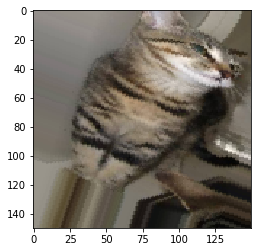

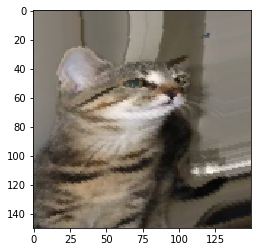

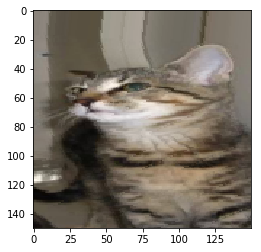

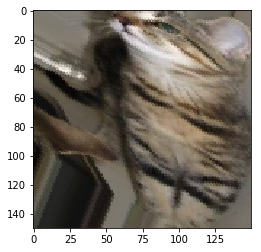

In [47]:
# We can now use this generator to take a look at the augmented images
import os, shutil
from keras.preprocessing import image
import matplotlib.pyplot as plt

train_cats_dir = train_dir + 'cats/'
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]
img_path = fnames[5]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [49]:
# Now let's train a network using this type of data generator
# We also add a dropout layer to further fight overfitting
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [57]:
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen_aug = ImageDataGenerator(rescale=1./255)
# No augmentation for validation data!

In [58]:
train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode='binary')

validation_generator_aug = test_datagen_aug.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
    train_generator_aug,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator_aug,
    validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 30s 304ms/step - loss: 0.8988 - acc: 0.6769 - val_loss: 0.5644 - val_acc: 0.7107
Epoch 2/100
100/100 [==============================] - 28s 276ms/step - loss: 0.6125 - acc: 0.6803 - val_loss: 0.5337 - val_acc: 0.7430
Epoch 3/100
100/100 [==============================] - 28s 277ms/step - loss: 0.5676 - acc: 0.7022 - val_loss: 0.4953 - val_acc: 0.7602
Epoch 4/100
100/100 [==============================] - 28s 277ms/step - loss: 0.5480 - acc: 0.7278 - val_loss: 0.4865 - val_acc: 0.7608
Epoch 5/100
100/100 [==============================] - 28s 278ms/step - loss: 0.5639 - acc: 0.7081 - val_loss: 0.5427 - val_acc: 0.7157
Epoch 6/100
100/100 [==============================] - 28s 278ms/step - loss: 0.5387 - acc: 0.7275 - val_loss: 0.4826 - val_acc: 0.7665
Epoch 7/100
100/100 [==============================] - 28s 277ms/step - loss: 0.5392 - acc: 0.7338 -

100/100 [==============================] - 28s 276ms/step - loss: 0.3981 - acc: 0.8237 - val_loss: 0.3746 - val_acc: 0.8274
Epoch 61/100
100/100 [==============================] - 28s 279ms/step - loss: 0.3958 - acc: 0.8194 - val_loss: 0.3683 - val_acc: 0.8274
Epoch 62/100
100/100 [==============================] - 28s 278ms/step - loss: 0.4045 - acc: 0.8156 - val_loss: 0.4091 - val_acc: 0.8052
Epoch 63/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3854 - acc: 0.8200 - val_loss: 0.3606 - val_acc: 0.8401
Epoch 64/100
100/100 [==============================] - 28s 276ms/step - loss: 0.3808 - acc: 0.8328 - val_loss: 0.4601 - val_acc: 0.7868
Epoch 65/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3729 - acc: 0.8275 - val_loss: 0.3536 - val_acc: 0.8388
Epoch 66/100
100/100 [==============================] - 28s 278ms/step - loss: 0.3843 - acc: 0.8303 - val_loss: 0.4010 - val_acc: 0.8046
Epoch 67/100
100/100 [==============================] 

In [59]:
# We can now save the model (as we'll need it later)
model.save('../models/cats_and_dogs/cats_and_dogs_small_2_CORRECT.h5')

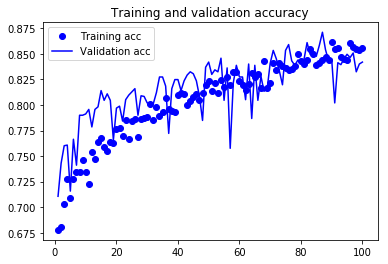

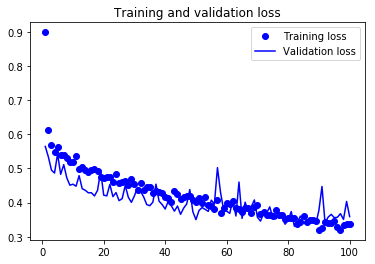

In [60]:
# And finally do the same plots. We can see that overfitting is basically gone...
# And accuracy is much higher
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()